# Exploring Dandiset 001335: Neuropixels Recordings from Hippocampus of Head-Fixed Mice During Odor Presentation

> **⚠️ IMPORTANT NOTE**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview

This notebook explores Dandiset 001335, which contains Neuropixels recordings from the hippocampus of head-fixed mice during odor presentation. The dataset includes electrophysiology data recorded using Neuropixels probes as mice were presented with various odor sequences.

You can view this dataset on Neurosift at: [https://neurosift.app/dandiset/001335](https://neurosift.app/dandiset/001335)


## What This Notebook Covers

In this notebook, we will:
1. Load and examine the dataset using the DANDI API
2. Explore the structure and metadata of the NWB file
3. Analyze the LFP (Local Field Potential) data
4. Examine the timing of different odor presentations
5. Visualize neural activity in relation to odor stimuli
6. Explore spike times for single units

## Required Packages

The following packages are required to run this notebook. We assume they are already installed on your system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
from matplotlib.ticker import MaxNLocator
import random
from matplotlib.colors import LinearSegmentedColormap

# Set up plotting style
sns.set_theme()

## Loading the Dandiset Using the DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 1 assets in the dataset

First 5 assets:
- sub-M541/sub-M541_ecephys.nwb


## Loading the NWB File

There is one NWB file in this Dandiset. We'll load it and explore its contents.

In [3]:
# Get the URL for the first asset
asset_id = "aca66db7-4c02-4453-8dcb-a179d44b1c5d"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
print(f"Loading NWB file: {assets[0].path} from URL: {url}")

# Load the NWB file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Loading NWB file: sub-M541/sub-M541_ecephys.nwb from URL: https://api.dandiarchive.org/api/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/download/


## Exploring the NWB File Metadata

Let's explore the basic metadata of this NWB file to understand what it contains.

In [4]:
# Print basic metadata
print(f"Session ID: {nwb.identifier}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experimenter: {', '.join(nwb.experimenter)}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")
print(f"Experiment Description: {nwb.experiment_description}")

# Get keywords
print("\nKeywords:")
keywords = nwb.keywords[:]
for kw in keywords:
    print(f"- {kw}")

# Get subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Description: {nwb.subject.description}")

Session ID: M541-2024-08-31
Session Description: Block 1:UE (ABC), Block 2:SE (DEF), Block3:Localizer
Session Start Time: 2025-02-14 10:53:25.647928-05:00
Experimenter: Mohapatra, Manish
Lab: vandermeerlab
Institution: Dartmouth College
Experiment Description: Head-fixed mouse presented with odor sequences

Keywords:
- ecephys
- neuropixels
- odor-sequences
- hippocampus

Subject Information:
Subject ID: M541
Species: Mus musculus
Sex: M
Age: P8W/
Description: Headbarr-ed mouse with craniotomies over dCA1


## Exploring the Experimental Blocks

This dataset contains three experimental blocks with different odor sequences. Let's examine the timing of these blocks.

In [5]:
# Get the time ranges for each block
blocks = ["Block 1", "Block 2", "Block 3"]
block_times = pd.DataFrame()

for block in blocks:
    if block in nwb.intervals:
        block_df = nwb.intervals[block].to_dataframe()
        block_times = pd.concat([block_times, pd.DataFrame({
            'Block': [block],
            'Start (s)': [block_df['start_time'].values[0]],
            'End (s)': [block_df['stop_time'].values[0]],
            'Duration (s)': [block_df['stop_time'].values[0] - block_df['start_time'].values[0]]
        })])

print("Experimental Blocks:")
print(block_times)

Experimental Blocks:
     Block  Start (s)  End (s)  Duration (s)
0  Block 1      616.0   2144.0        1528.0
0  Block 2     2712.0   4243.0        1531.0
0  Block 3     4859.0   6182.0        1323.0


## Examining Odor Presentation Intervals

The experiment involves presenting different odors to the mouse. Let's examine when these odors were presented.

In [6]:
# Get the odor presentation intervals
odors = ["Odor A ON", "Odor B ON", "Odor C ON", "Odor D ON", "Odor E ON", "Odor F ON"]
odor_dfs = {}

for odor in odors:
    if odor in nwb.intervals:
        odor_dfs[odor] = nwb.intervals[odor].to_dataframe()
        print(f"{odor}: {len(odor_dfs[odor])} presentations")
        
# Display the first few presentations of each odor
for odor, df in odor_dfs.items():
    print(f"\nFirst 5 presentations of {odor}:")
    print(df.head())

Odor A ON: 101 presentations
Odor B ON: 101 presentations
Odor C ON: 101 presentations
Odor D ON: 101 presentations
Odor E ON: 101 presentations
Odor F ON: 101 presentations

First 5 presentations of Odor A ON:
    start_time   stop_time
id                        
0   645.080373  647.080420
1   664.281680  666.281687
2   676.904860  678.904900
3   683.812947  685.929067
4   713.719500  715.719507

First 5 presentations of Odor B ON:
    start_time   stop_time
id                        
0   627.418073  629.418080
1   633.358200  635.358207
2   638.969287  640.969293
3   651.089427  653.089507
4   690.905153  692.905160

First 5 presentations of Odor C ON:
    start_time   stop_time
id                        
0   621.836987  623.836993
1   657.730513  659.730553
2   670.026727  672.026733
3   696.419200  698.419207
4   701.956287  703.956333

First 5 presentations of Odor D ON:
     start_time    stop_time
id                          
0   2717.421520  2719.421600
1   2736.320860  2738.32

Let's visualize the timing of odor presentations and experimental blocks.

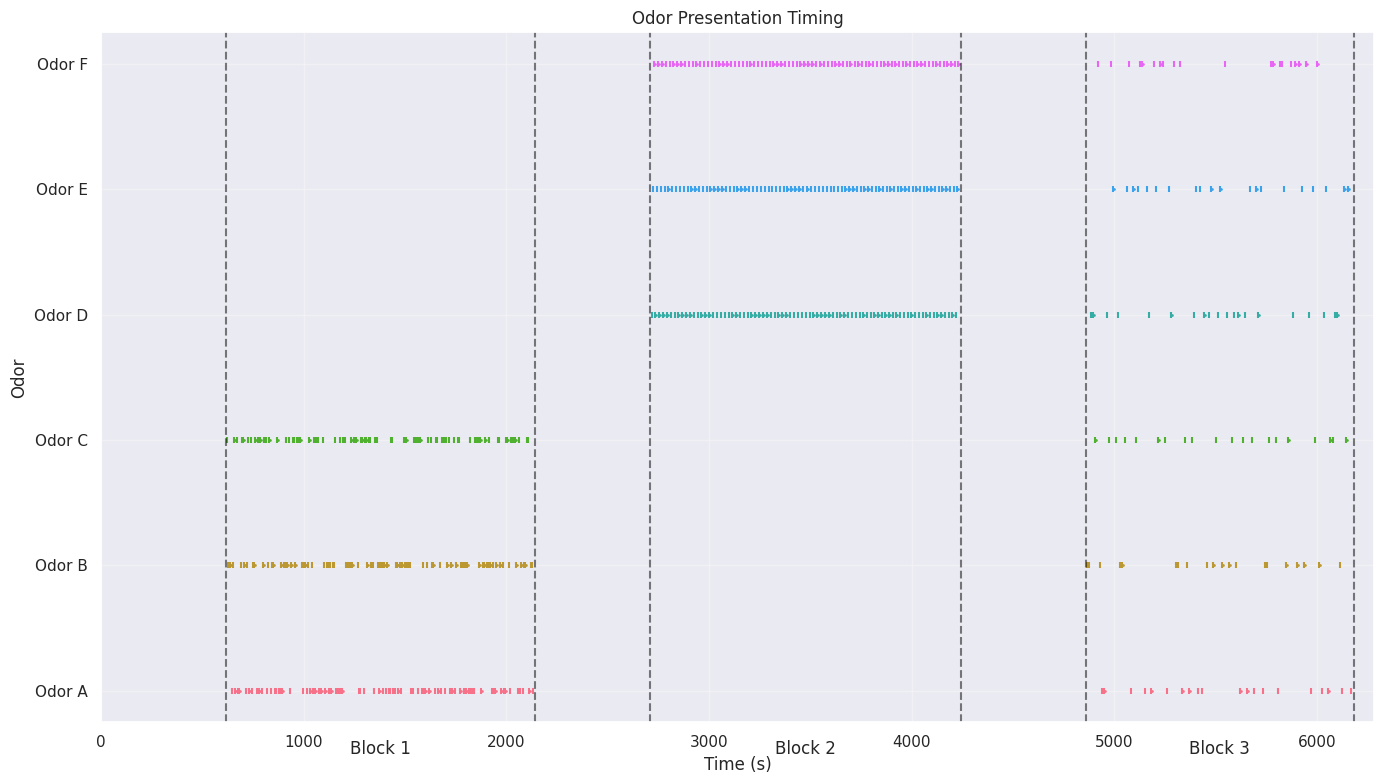

In [7]:
# Prepare figure
plt.figure(figsize=(14, 8))
colors = sns.color_palette("husl", len(odors))

# Plot odor presentations
for i, (odor, df) in enumerate(odor_dfs.items()):
    # Plot horizontal lines for each presentation
    for _, row in df.iterrows():
        plt.plot([row['start_time'], row['stop_time']], [i, i], 
                 color=colors[i], linewidth=2)
    
    # Place small markers at the start of each presentation for better visibility
    plt.scatter(df['start_time'], [i] * len(df), 
                color=colors[i], s=20, marker='|')

# Add block boundaries as vertical lines
for _, row in block_times.iterrows():
    plt.axvline(row['Start (s)'], color='black', linestyle='--', alpha=0.5)
    plt.axvline(row['End (s)'], color='black', linestyle='--', alpha=0.5)
    plt.text(row['Start (s)'] + (row['End (s)'] - row['Start (s)'])/2, -0.5, 
             row['Block'], horizontalalignment='center')

# Customize plot
plt.yticks(range(len(odors)), [odor.replace(" ON", "") for odor in odors])
plt.xlabel('Time (s)')
plt.ylabel('Odor')
plt.title('Odor Presentation Timing')
plt.grid(True, alpha=0.3)

# Adjust x-axis to focus on experimental time
plt.xlim(0, block_times['End (s)'].max() + 100)
plt.tight_layout()

## Examining Electrodes and LFP Data

Now, let's look at the electrodes and the LFP (Local Field Potential) data.

In [8]:
# Get electrode information
electrodes_df = nwb.electrodes.to_dataframe()

# Display electrode information
print(f"Number of electrodes: {len(electrodes_df)}")
print("\nSample of electrode data:")
print(electrodes_df.head())

# Print electrode groups
print("\nElectrode Groups:")
for group_name, group in nwb.electrode_groups.items():
    print(f"- {group_name}: {group.description}, Location: {group.location}")

Number of electrodes: 64

Sample of electrode data:
      location                                              group  \
id                                                                  
0   brain area  imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...   
1   brain area  imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...   
2   brain area  imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...   
3   brain area  imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...   
4   brain area  imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...   

      group_name           label   depth hemisphere  
id                                                   
0   imec0.shank0  imec0.ap#AP112  2390.0      Right  
1   imec0.shank0  imec0.ap#AP126  2285.0      Right  
2   imec0.shank0  imec0.ap#AP138  2195.0      Right  
3   imec0.shank0  imec0.ap#AP200  2090.0      Right  
4   imec0.shank0  imec0.ap#AP214  1985.0      Right  

Electrode Groups:
- imec0.shank0: electrode group for shank 0 on imec0, Location: bra

Let's examine the LFP data that's available in the processing module.

In [9]:
# Get LFP data information
lfp = nwb.processing["ecephys"].data_interfaces["LFP"]

print(f"LFP Description: {lfp.description}")
print(f"LFP Rate: {lfp.rate} Hz")
print(f"LFP Unit: {lfp.unit}")
print(f"LFP Data Shape: {lfp.data.shape}")  # (time_points, channels)
print(f"LFP Starting Time: {lfp.starting_time} {lfp.starting_time_unit}")

LFP Description: Raw data subsampled  2500 Hz and bandpass filtered in the range 1-400 Hz
LFP Rate: 2500.0 Hz
LFP Unit: volts
LFP Data Shape: (15475276, 64)
LFP Starting Time: 0.0 seconds


Let's visualize a small segment of LFP data from a few channels.

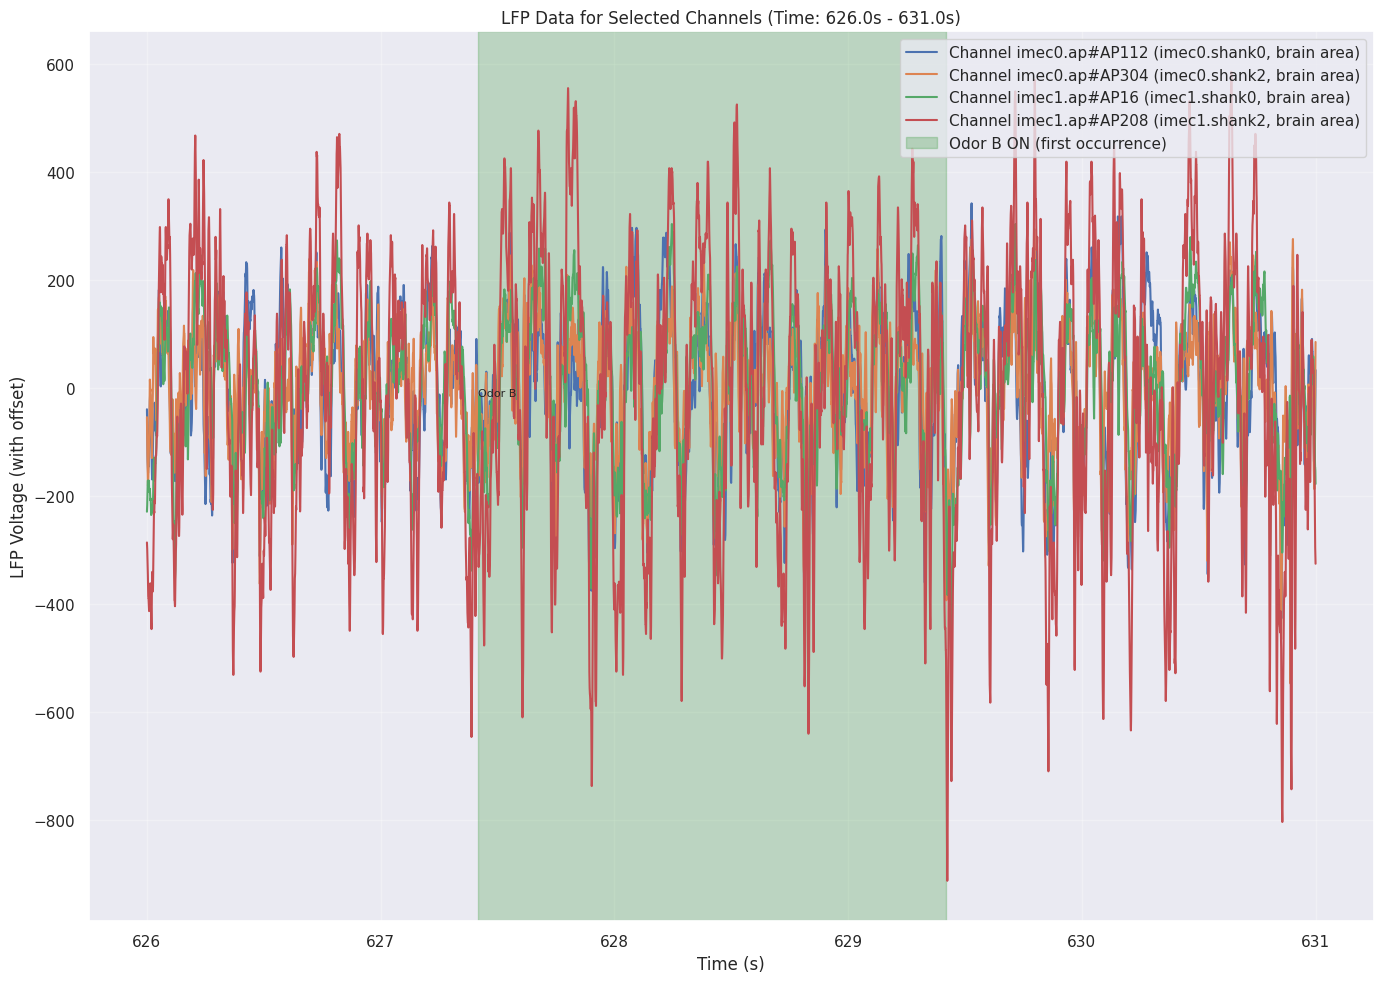

In [10]:
# Select a time window (5-second segment from the first block)
block1_start = block_times[block_times['Block'] == 'Block 1']['Start (s)'].values[0]
start_time = block1_start + 10  # 10 seconds into Block 1
duration = 5  # 5 seconds of data

# Calculate sample indices
start_idx = int(start_time * lfp.rate)
end_idx = int((start_time + duration) * lfp.rate)

# Select a few channels for visualization
selected_channels = [0, 16, 32, 48]  # Selecting a few channels across different shanks

# Create time array for x-axis
time_array = np.linspace(start_time, start_time + duration, end_idx - start_idx)

# Create the plot
plt.figure(figsize=(14, 10))

# Plot LFP data for selected channels
for i, channel in enumerate(selected_channels):
    # Get data for this channel in the time window
    lfp_data = lfp.data[start_idx:end_idx, channel]
    
    # Get channel information
    channel_info = electrodes_df.iloc[channel]
    
    # Plot with offset for visibility
    offset = i * 0.5  # Offset each channel for better visibility
    plt.plot(time_array, lfp_data + offset, 
             label=f"Channel {channel_info['label']} ({channel_info['group_name']}, {channel_info['location']})")

# Add markers for odor presentations in this time window
for odor, df in odor_dfs.items():
    odor_in_window = df[(df['start_time'] >= start_time) & 
                       (df['start_time'] <= start_time + duration)]
    
    if not odor_in_window.empty:
        for _, row in odor_in_window.iterrows():
            plt.axvspan(row['start_time'], min(row['stop_time'], start_time + duration),
                      alpha=0.2, color='green', label=f"{odor} (first occurrence)" if _ == 0 else "")
            plt.text(row['start_time'], -0.5, odor.replace(" ON", ""), 
                   fontsize=8, verticalalignment='top')

# Customize plot
plt.xlabel('Time (s)')
plt.ylabel('LFP Voltage (with offset)')
plt.title(f'LFP Data for Selected Channels (Time: {start_time:.1f}s - {start_time+duration:.1f}s)')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

# Clean up legend (to avoid duplicates)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.tight_layout()

## Computing and Visualizing LFP Power Spectrum

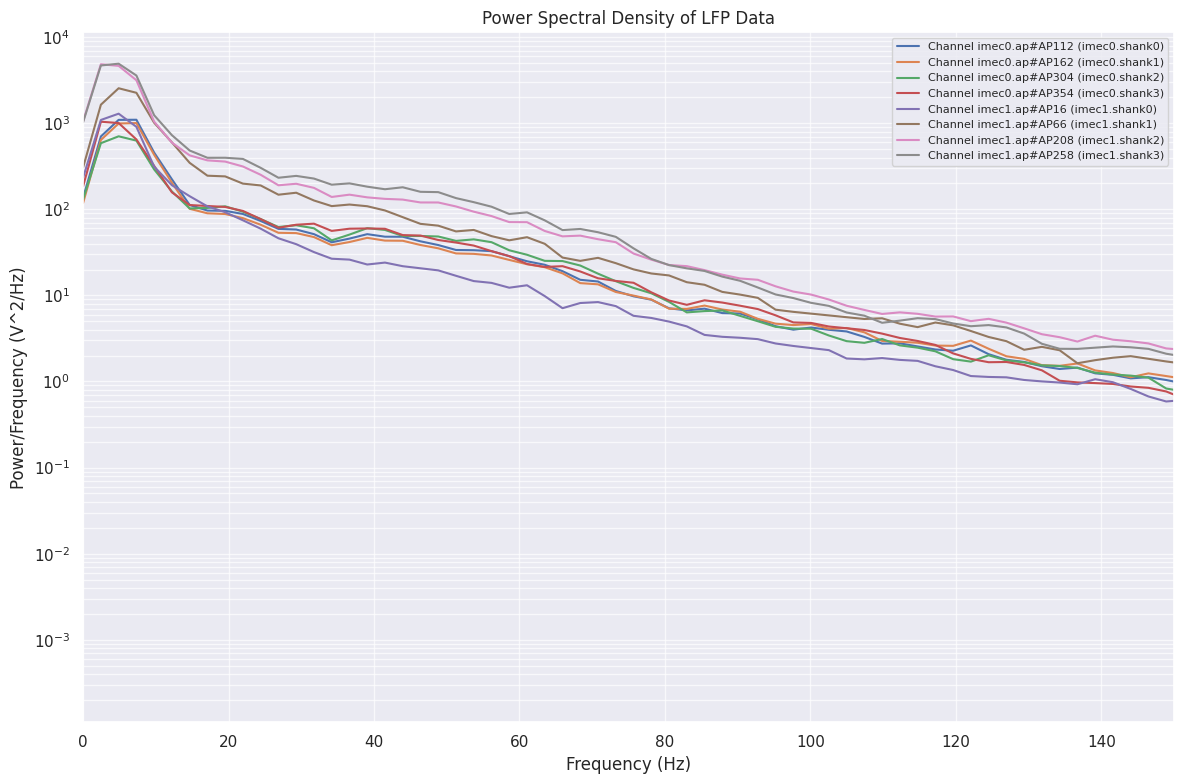

In [11]:
# Function to compute power spectrum
def compute_psd(data, fs, nperseg=1024, noverlap=512):
    from scipy import signal
    freqs, psd = signal.welch(data, fs=fs, nperseg=nperseg, noverlap=noverlap)
    return freqs, psd

# Select a longer segment of data (30 seconds) for PSD calculation
start_time_psd = block1_start + 100  # 100 seconds into Block 1
duration_psd = 30  # 30 seconds of data
start_idx_psd = int(start_time_psd * lfp.rate)
end_idx_psd = int((start_time_psd + duration_psd) * lfp.rate)

# Compute PSDs for multiple channels
plt.figure(figsize=(12, 8))

# Select channels from different electrode groups
channel_groups = electrodes_df.groupby('group_name').groups
selected_channels_psd = []

# Get one representative channel from each electrode group (up to 8 groups)
for group_name, indices in list(channel_groups.items())[:8]:
    selected_channels_psd.append(indices[0])

for channel in selected_channels_psd:
    # Get data
    lfp_segment = lfp.data[start_idx_psd:end_idx_psd, channel]
    
    # Compute PSD
    freqs, psd = compute_psd(lfp_segment, fs=lfp.rate)
    
    # Plot
    channel_info = electrodes_df.iloc[channel]
    plt.semilogy(freqs, psd, label=f"Channel {channel_info['label']} ({channel_info['group_name']})")

# Customize plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (V^2/Hz)')
plt.title('Power Spectral Density of LFP Data')
plt.xlim(0, 150)  # Focus on 0-150 Hz range
plt.legend(fontsize=8)
plt.grid(True, which="both", ls="-", alpha=0.7)
plt.tight_layout()

## Analyzing Neural Units and Spike Times

This dataset includes spike times for 283 neural units. Let's explore this data.

In [12]:
# Get unit information
units_df = nwb.units.to_dataframe()
print(f"Number of units: {len(units_df)}")
print("\nSample of unit data (first few columns):")
print(units_df[['electrode_group', 'depth', 'hemisphere']].head())

# Count units by electrode group
unit_counts = units_df['electrode_group'].value_counts()
print("\nUnits per electrode group:")
for group, count in unit_counts.items():
    print(f"- {group}: {count} units")

Number of units: 283

Sample of unit data (first few columns):
                                      electrode_group   depth hemisphere
id                                                                      
0   imec0.shank2 pynwb.ecephys.ElectrodeGroup at 0...  2165.0      Right
1   imec0.shank2 pynwb.ecephys.ElectrodeGroup at 0...  2105.0      Right
2   imec0.shank2 pynwb.ecephys.ElectrodeGroup at 0...  2105.0      Right
3   imec0.shank2 pynwb.ecephys.ElectrodeGroup at 0...  2060.0      Right
4   imec0.shank2 pynwb.ecephys.ElectrodeGroup at 0...  2045.0      Right

Units per electrode group:
- imec1.shank3 pynwb.ecephys.ElectrodeGroup at 0x125034735672144
Fields:
  description: electrode group for shank 3 on imec1
  device: imec1 pynwb.device.Device at 0x125036640177616
Fields:
  description: 4-shank NPX2.0 
  manufacturer: IMEC

  location: brain area
: 54 units
- imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0x125034735671088
Fields:
  description: electrode group for shank 0 on im

Let's visualize spike times for a selection of units during an odor presentation.

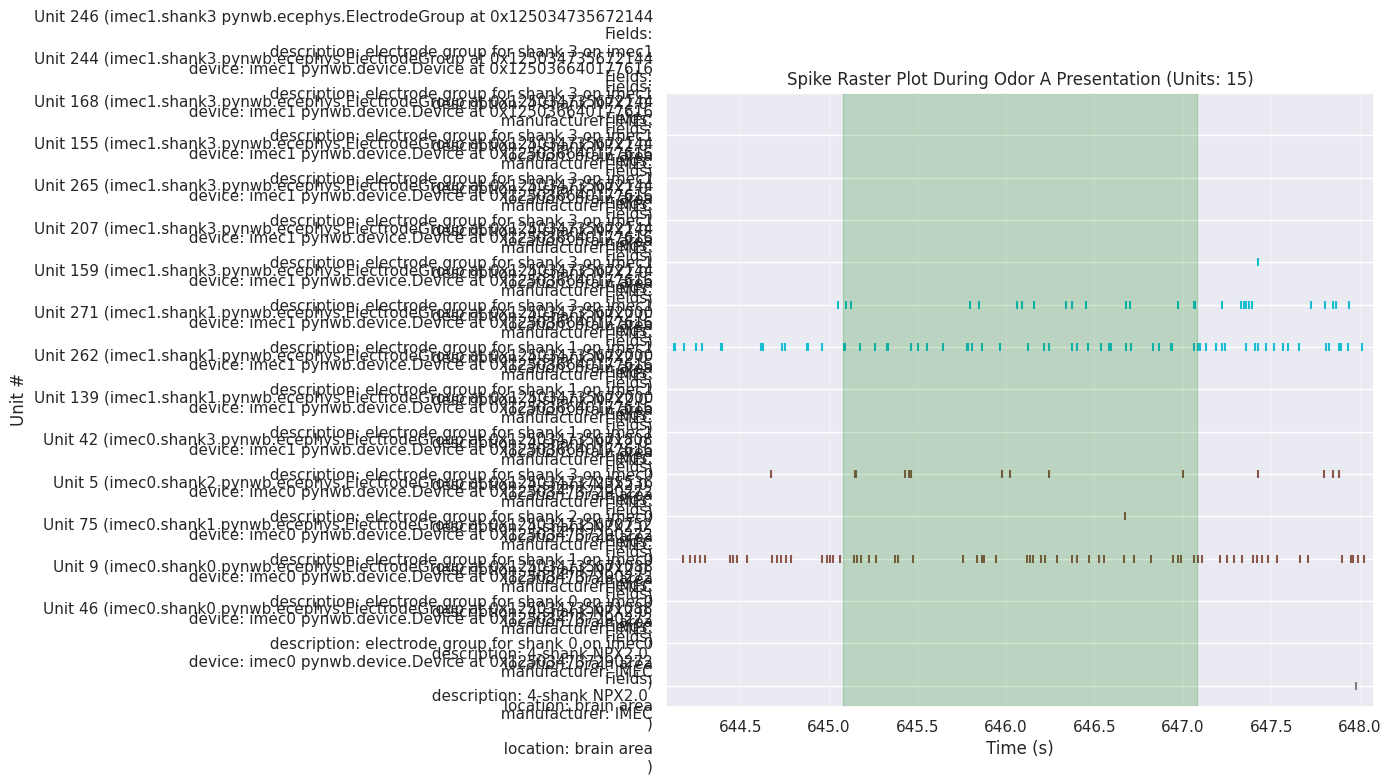

In [13]:
# Define a function to get spike times within a specific time window
def get_spikes_in_window(units_df, unit_ids, start_time, end_time):
    spike_data = []
    
    for unit_id in unit_ids:
        # Get the spike times for this unit
        spike_times = units_df.loc[unit_id, 'spike_times'][:]
        
        # Filter for spikes within the time window
        mask = (spike_times >= start_time) & (spike_times <= end_time)
        unit_spikes = spike_times[mask]
        
        # Get electrode group info and convert to string for sorting
        electrode_group = units_df.loc[unit_id, 'electrode_group']
        electrode_group_name = str(electrode_group)  # Use string representation for sorting
        
        spike_data.append({
            'unit_id': unit_id,
            'spikes': unit_spikes,
            'count': len(unit_spikes),
            'electrode_group': electrode_group,
            'electrode_group_name': electrode_group_name
        })
    
    # Sort by electrode group name and spike count
    spike_data = sorted(spike_data, key=lambda x: (x['electrode_group_name'], -x['count']))
    
    return spike_data

# Select an odor presentation interval (e.g., the first presentation of Odor A)
odor_a_first = odor_dfs['Odor A ON'].iloc[0]
start_time_odor = odor_a_first['start_time'] - 1  # 1 second before odor onset
end_time_odor = odor_a_first['stop_time'] + 1     # 1 second after odor offset

# Select 15 random units to visualize (to avoid overcrowding)
np.random.seed(42)  # For reproducibility
random_units = np.random.choice(units_df.index, size=15, replace=False)
selected_units = sorted(random_units)

# Get spike data for selected units during the time window
spike_data = get_spikes_in_window(units_df, selected_units, start_time_odor, end_time_odor)

# Create a raster plot
plt.figure(figsize=(14, 8))

for i, unit_data in enumerate(spike_data):
    # Plot spike times
    unit_id = unit_data['unit_id']
    spikes = unit_data['spikes']
    
    if len(spikes) > 0:
        plt.scatter(spikes, [i] * len(spikes), marker='|', s=40, 
                   color=plt.cm.tab10(hash(str(unit_data['electrode_group'])) % 10))

# Add a colored bar for odor presentation
plt.axvspan(odor_a_first['start_time'], odor_a_first['stop_time'], 
           alpha=0.2, color='green', label='Odor A Presentation')

# Customize plot
plt.xlabel('Time (s)')
plt.ylabel('Unit #')
plt.title(f'Spike Raster Plot During Odor A Presentation (Units: {len(selected_units)})')
plt.yticks(range(len(spike_data)), 
          [f"Unit {d['unit_id']} ({d['electrode_group']})" for d in spike_data])
plt.xlim(start_time_odor, end_time_odor)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()

## Analyzing Firing Rate Changes During Odor Presentation

Let's examine how the firing rates of units change before, during, and after odor presentation.

Found 283 active units with more than 100 spikes


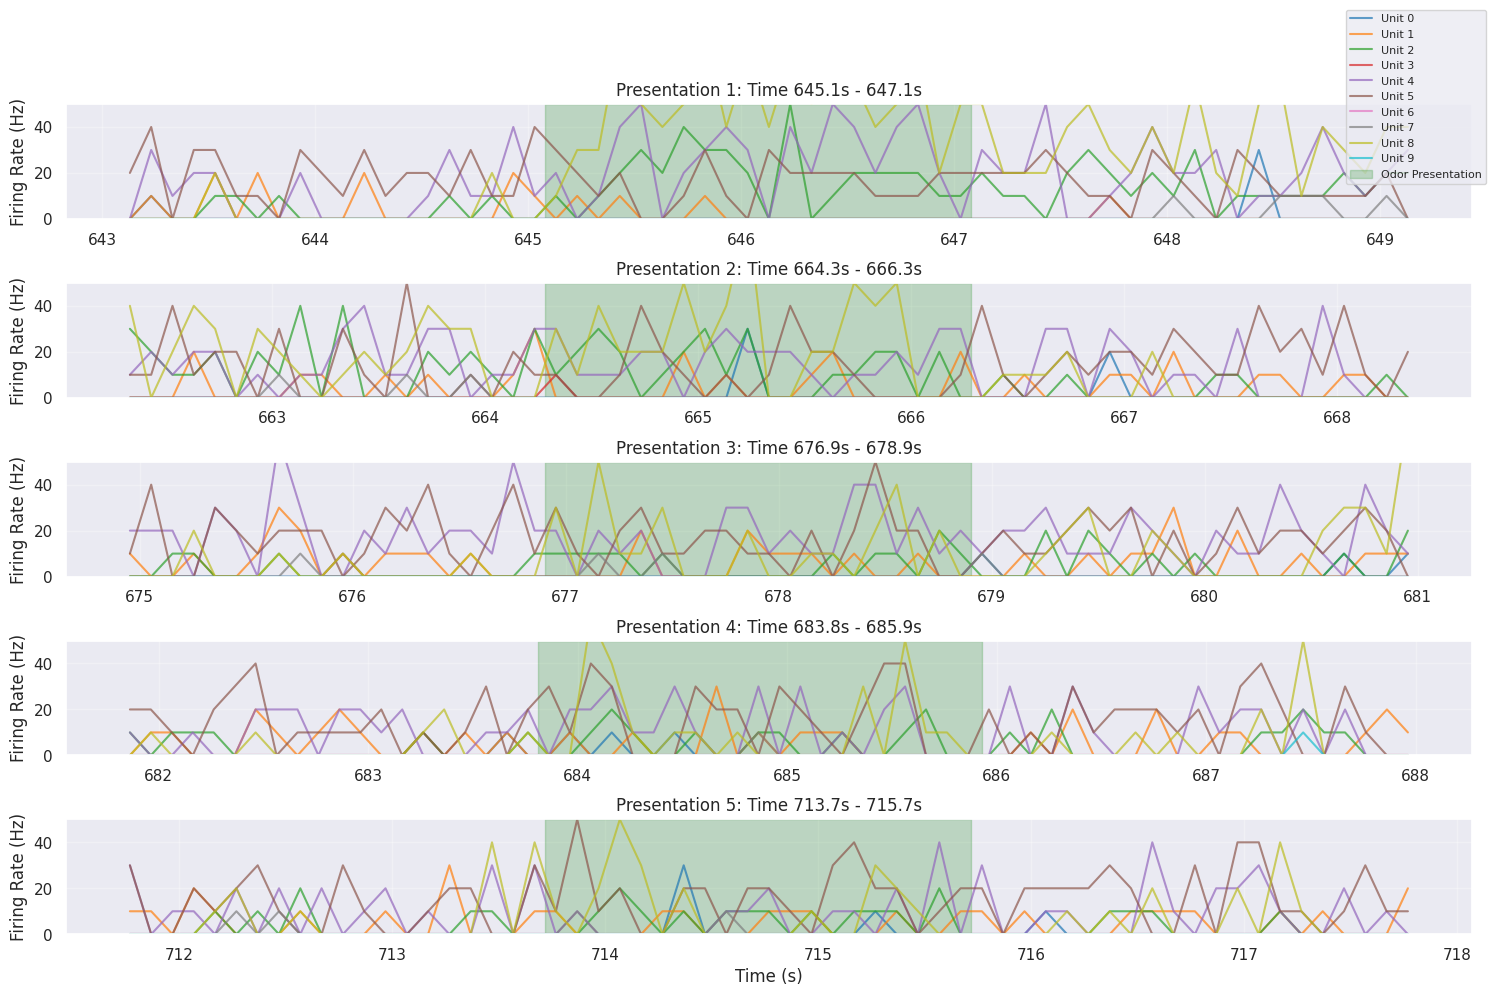

In [14]:
# Function to calculate firing rates in bins
def calculate_firing_rates(units_df, unit_ids, start_time, end_time, bin_width=0.1):
    time_bins = np.arange(start_time, end_time + bin_width, bin_width)
    bin_centers = time_bins[:-1] + bin_width/2
    
    unit_firing_rates = {}
    
    for unit_id in unit_ids:
        # Get spike times for this unit
        spike_times = units_df.loc[unit_id, 'spike_times'][:]
        
        # Count spikes in each bin
        hist, _ = np.histogram(spike_times, bins=time_bins)
        
        # Convert to firing rate (spikes/second)
        firing_rates = hist / bin_width
        
        unit_firing_rates[unit_id] = firing_rates
    
    return bin_centers, unit_firing_rates

# Select an odor (we'll use Odor A again) and examine multiple presentations
odor = "Odor A ON"
num_presentations_to_analyze = 5
presentations = odor_dfs[odor].iloc[:num_presentations_to_analyze]

# Select units that have a good number of spikes
active_unit_threshold = 100  # Minimum number of spikes to be considered active
active_units = []

for unit_id in units_df.index:
    if len(units_df.loc[unit_id, 'spike_times'][:]) > active_unit_threshold:
        active_units.append(unit_id)

print(f"Found {len(active_units)} active units with more than {active_unit_threshold} spikes")

# We'll select a subset of these active units
selected_active_units = active_units[:10]  # Use first 10 active units

# Analyze each presentation
plt.figure(figsize=(15, 10))

for i, (_, presentation) in enumerate(presentations.iterrows()):
    # Define time window (3s before to 3s after the presentation)
    pre_time = 2.0  # seconds before odor onset
    post_time = 2.0  # seconds after odor offset
    
    start_time = presentation['start_time'] - pre_time
    end_time = presentation['stop_time'] + post_time
    
    # Calculate firing rates
    bin_width = 0.1  # 100ms bins
    bin_centers, unit_firing_rates = calculate_firing_rates(
        units_df, selected_active_units, start_time, end_time, bin_width)
    
    # Create subplot
    plt.subplot(num_presentations_to_analyze, 1, i+1)
    
    # Plot firing rates for each unit
    for j, unit_id in enumerate(selected_active_units):
        color = plt.cm.tab10(j % 10)
        plt.plot(bin_centers, unit_firing_rates[unit_id], color=color, alpha=0.7,
                label=f"Unit {unit_id}" if i == 0 else "")  # Only include labels in the first subplot
    
    # Mark odor presentation period
    plt.axvspan(presentation['start_time'], presentation['stop_time'], 
               alpha=0.2, color='green', label='Odor Presentation' if i == 0 else "")
    
    # Add titles and labels
    presentation_num = i + 1
    plt.title(f"Presentation {presentation_num}: Time {presentation['start_time']:.1f}s - {presentation['stop_time']:.1f}s")
    
    if i == num_presentations_to_analyze - 1:  # Only add x-label to the bottom subplot
        plt.xlabel('Time (s)')
    
    plt.ylabel('Firing Rate (Hz)')
    plt.grid(True, alpha=0.3)
    
    # Custom y-axis limits to focus on the data
    plt.ylim(0, 50)  # Assuming most rates are under 50 Hz

# Add a single legend for all subplots
plt.subplot(num_presentations_to_analyze, 1, 1)
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper right', fontsize=8, bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the legend

## Comparing Neural Responses to Different Odors

Now, let's compare how neurons respond to different odors.

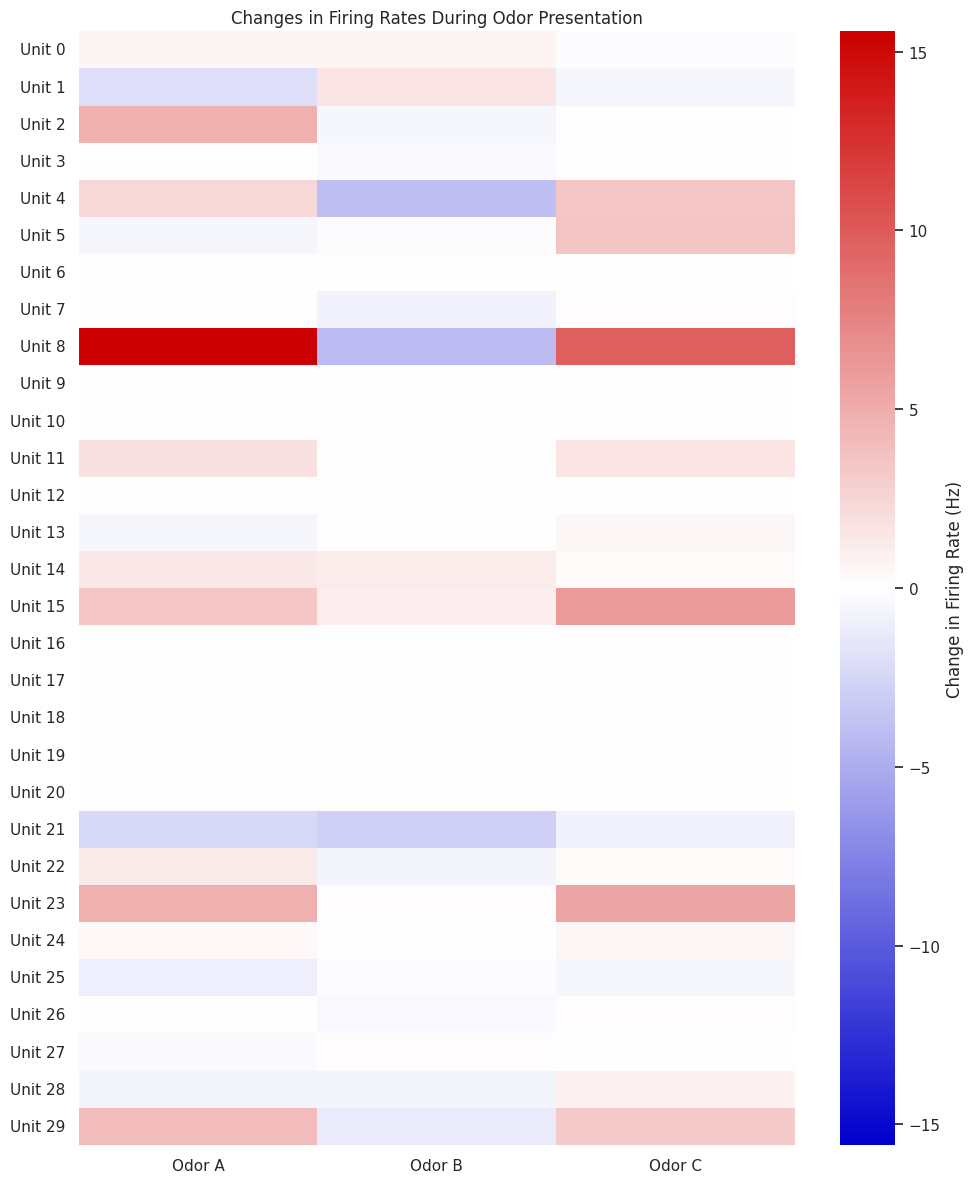

In [15]:
# Function to calculate average firing rate changes
def calculate_avg_firing_rate_change(units_df, unit_ids, odor_df, n_presentations=5, 
                                    pre_window=2.0, post_window=2.0, bin_width=0.5):
    # We'll calculate the average change in firing rate for each unit
    unit_responses = {}
    
    for unit_id in unit_ids:
        # Initialize arrays for before, during, and after odor
        before_rates = []
        during_rates = []
        after_rates = []
        
        # Process each presentation (up to n_presentations)
        for idx, row in odor_df.iloc[:n_presentations].iterrows():
            odor_start = row['start_time']
            odor_end = row['stop_time']
            
            # Get spike times for this unit
            spike_times = units_df.loc[unit_id, 'spike_times'][:]
            
            # Count spikes in the three windows
            before_spikes = sum((spike_times >= odor_start - pre_window) & 
                               (spike_times < odor_start))
            during_spikes = sum((spike_times >= odor_start) & 
                               (spike_times < odor_end))
            after_spikes = sum((spike_times >= odor_end) & 
                              (spike_times < odor_end + post_window))
            
            # Convert to rates (spikes/second)
            before_rate = before_spikes / pre_window
            during_rate = during_spikes / (odor_end - odor_start)
            after_rate = after_spikes / post_window
            
            # Append to lists
            before_rates.append(before_rate)
            during_rates.append(during_rate)
            after_rates.append(after_rate)
        
        # Calculate averages across presentations
        unit_responses[unit_id] = {
            'before': np.mean(before_rates),
            'during': np.mean(during_rates),
            'after': np.mean(after_rates),
            'change_during': np.mean(during_rates) - np.mean(before_rates),
            'electrode_group': units_df.loc[unit_id, 'electrode_group']
        }
    
    return unit_responses

# Select odors to compare
odors_to_compare = ["Odor A ON", "Odor B ON", "Odor C ON"]

# Calculate responses for a larger set of active units
n_active_units = min(30, len(active_units))  # Use up to 30 active units
units_for_comparison = active_units[:n_active_units]

# Calculate responses for each odor
odor_responses = {}
for odor in odors_to_compare:
    odor_responses[odor] = calculate_avg_firing_rate_change(
        units_df, units_for_comparison, odor_dfs[odor], n_presentations=5)

# Create a heatmap of responses to different odors
response_matrix = np.zeros((len(units_for_comparison), len(odors_to_compare)))

for i, unit_id in enumerate(units_for_comparison):
    for j, odor in enumerate(odors_to_compare):
        response_matrix[i, j] = odor_responses[odor][unit_id]['change_during']

# Create a custom colormap centered at zero
colors = [(0, 0, 0.8), (1, 1, 1), (0.8, 0, 0)]  # Blue -> White -> Red
cmap = LinearSegmentedColormap.from_list('custom_diverging', colors, N=256)

# Plot the heatmap
plt.figure(figsize=(10, 12))
vmax = max(5, np.abs(response_matrix).max())  # Cap at 5Hz or actual max
sns.heatmap(response_matrix, cmap=cmap, center=0, vmin=-vmax, vmax=vmax,
           yticklabels=[f"Unit {u}" for u in units_for_comparison],
           xticklabels=[odor.replace(" ON", "") for odor in odors_to_compare],
           cbar_kws={'label': 'Change in Firing Rate (Hz)'})

plt.title('Changes in Firing Rates During Odor Presentation')
plt.tight_layout()

## Examining the Relationship Between Electrode Location and Unit Responses

Let's visualize how the unit responses vary based on their electrode location.

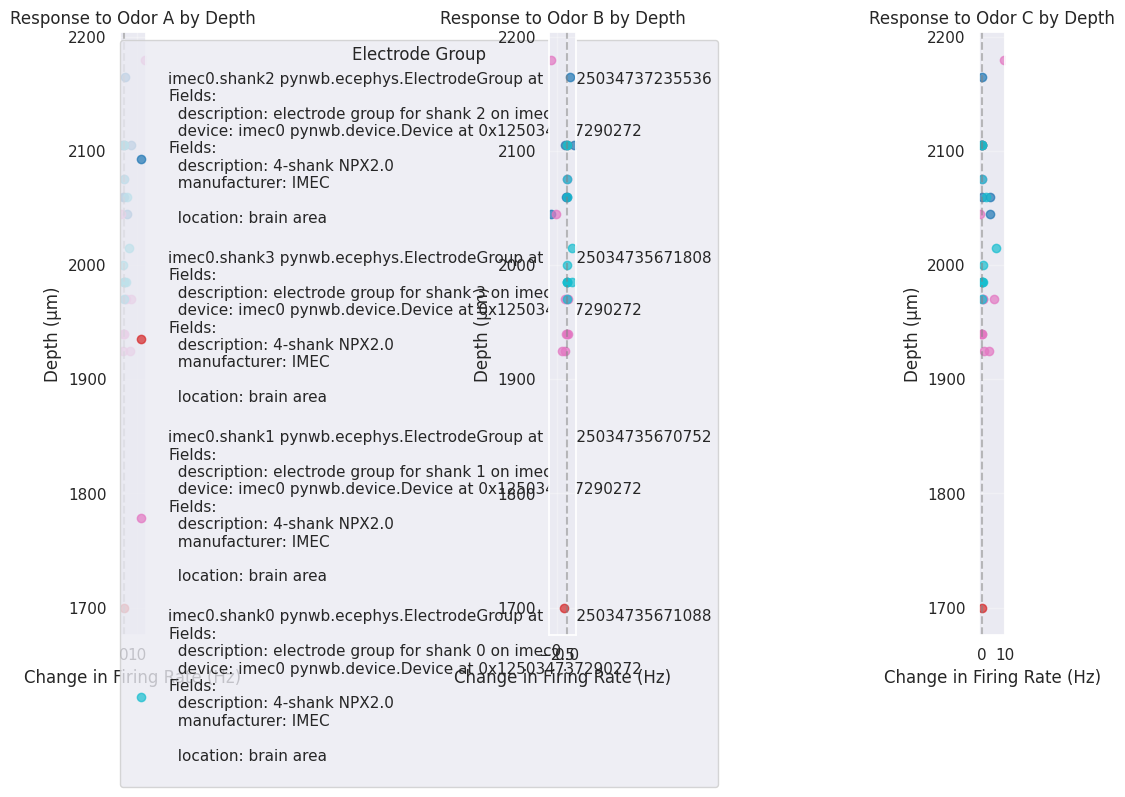

In [16]:
# Combine unit info with response data
unit_data = []

for unit_id in units_for_comparison:
    unit_info = {
        'unit_id': unit_id,
        'electrode_group': units_df.loc[unit_id, 'electrode_group'],
        'depth': units_df.loc[unit_id, 'depth'],
        'hemisphere': units_df.loc[unit_id, 'hemisphere']
    }
    
    # Add response data for each odor
    for odor in odors_to_compare:
        odor_name = odor.replace(" ON", "")
        unit_info[f'{odor_name}_change'] = odor_responses[odor][unit_id]['change_during']
    
    unit_data.append(unit_info)

# Convert to DataFrame
response_df = pd.DataFrame(unit_data)

# Create a scatter plot of responses by depth for each electrode group
plt.figure(figsize=(10, 8))

# Get unique electrode groups
electrode_groups = response_df['electrode_group'].unique()
n_groups = len(electrode_groups)
colors = plt.cm.tab10(np.linspace(0, 1, n_groups))

# Create one subplot per odor
for i, odor in enumerate(odors_to_compare):
    odor_name = odor.replace(" ON", "")
    response_column = f'{odor_name}_change'
    
    plt.subplot(1, 3, i+1)
    
    for j, group in enumerate(electrode_groups):
        # Filter for this group
        group_data = response_df[response_df['electrode_group'] == group]
        
        # Plot
        plt.scatter(group_data[response_column], group_data['depth'], 
                   color=colors[j], label=group, alpha=0.7)
    
    # Customize plot
    plt.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Zero line
    plt.title(f'Response to {odor_name} by Depth')
    plt.xlabel('Change in Firing Rate (Hz)')
    plt.ylabel('Depth (μm)')
    plt.grid(True, alpha=0.3)
    
    if i == 0:  # Only include legend in first subplot
        plt.legend(title='Electrode Group', loc='upper left', bbox_to_anchor=(-0.3, 1))

plt.tight_layout()

## Summary

In this notebook, we've explored Dandiset 001335, which contains Neuropixels recordings from the hippocampus of head-fixed mice during odor presentation. We've analyzed:

1. The structure and metadata of the NWB file
2. The timing of experimental blocks and odor presentations
3. The Local Field Potential (LFP) data and its spectral properties
4. Spike times and firing rates for individual neural units
5. Neural responses to different odors
6. The relationship between electrode location and neural responses

The dataset provides rich information about how hippocampal neurons respond to different odor stimuli. The analysis revealed that some neurons show clear changes in firing rate during odor presentation, while others do not. There also appears to be some specificity in how neurons respond to different odors.

## Future Directions

Future analyses could explore:

1. Population-level analysis of neural responses using dimensionality reduction techniques
2. More sophisticated spectral analysis of LFP data, including coherence between channels
3. Analysis of spike-field coupling between unit activity and LFP oscillations
4. Comparison of responses across different experimental blocks to study learning or habituation effects
5. More detailed analysis of the temporal dynamics of neural responses during odor presentation